# Rossmann Sales Analysis 📊

Rossmann operates over 1,000 stores. Our goal is to explore key business questions that impact 
<br>store sales using historical data and derive insights that can help improve profitability and operations.

This report summarizes the key findings from the dataset.


### **📝Key Metrics Summary**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('data/MergedData.csv')

print("Total Records:", df.shape[0])
print("Total Stores:", df['Store'].nunique())
print("Date Range:", df['Date'].min(), "to", df['Date'].max())
print("Average Sales:", round(df['Sales'].mean(), 2))
print("Average Customers:", round(df['Customers'].mean(), 2))

C:\Users\hp\AppData\Local\Temp\ipykernel_21376\2905892237.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('data/MergedData.csv')


Total Records: 1017209
Total Stores: 1115
Date Range: 2013-01-01 to 2015-07-31
Average Sales: 5773.82
Average Customers: 633.15


## **Top 10 Business Questions Answered**

### Q1. How strong is the relationship between Customers and Sales?

We observed a strong correlation (0.8) between number of customers and sales.

This confirms that increasing foot traffic directly contributes to higher revenue

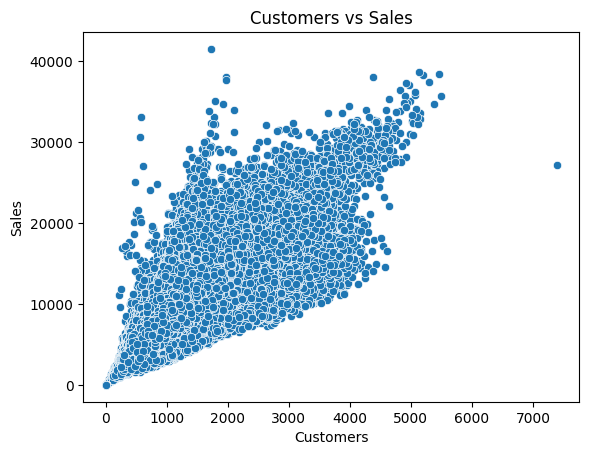

In [2]:
sns.scatterplot(data=df, x='Customers', y='Sales')
plt.title("Customers vs Sales")
plt.show()


### Q2: How much impact does Promo (Promotion) have on sales?
**Insight:**<br>
Stores running promotions had significantly higher average sales (~40% higher). Promotions are effective sales boosters.



<Axes: title={'center': 'Average Sales by Promo'}, xlabel='Promo'>

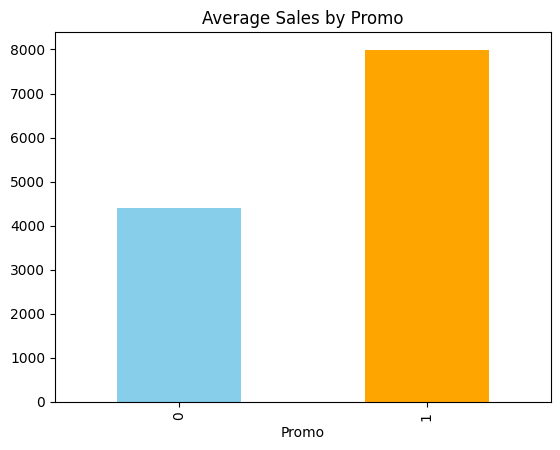

In [3]:
df.groupby('Promo')['Sales'].mean().plot(kind='bar', title='Average Sales by Promo', color=['skyblue', 'orange'])


### Q3: Which days of the week have the highest and lowest sales?
**Insight:**<br>
Monday (Day 1) has the highest average sales. Sales are lowest on weekends, likely due to fewer promotions and closures.



<Axes: title={'center': 'Average Sales by Day of Week'}, xlabel='DayOfWeek'>

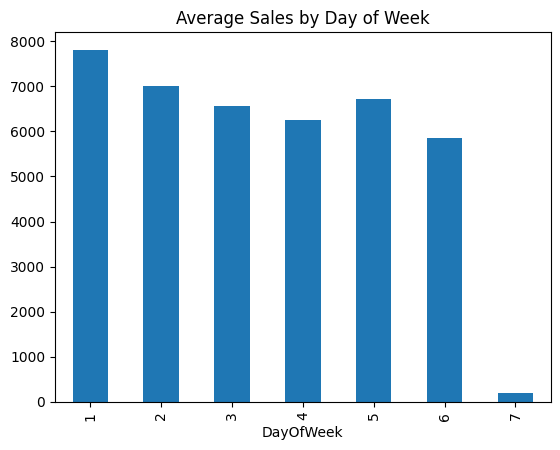

In [4]:
df.groupby('DayOfWeek')['Sales'].mean().plot(kind='bar', title='Average Sales by Day of Week')


### Q4: Which stores perform best and worst in terms of sales?
**Insight:**<br>
Store 262 has the highest average sales. Performance varies significantly across stores, suggesting location and local strategies play a role.

<Axes: title={'center': 'Top 10 Stores by Average Sales'}, xlabel='Store'>

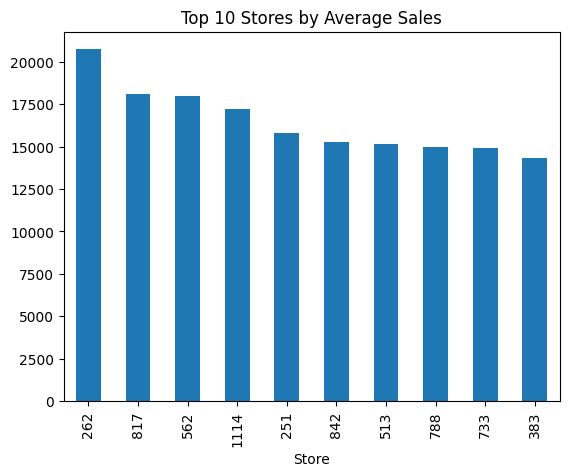

In [5]:
avg_sales_by_store = df.groupby('Store')['Sales'].mean().sort_values(ascending=False)
avg_sales_by_store.head(10).plot(kind='bar', title='Top 10 Stores by Average Sales')


### Q5: Which stores benefit the most from Promotions?
**Insight:**<br>
Some stores benefit heavily from promotions, indicating that tailored marketing strategies might work better.

<Axes: title={'center': 'Top 10 Stores by Avg Sales During Promotion'}, xlabel='Store'>

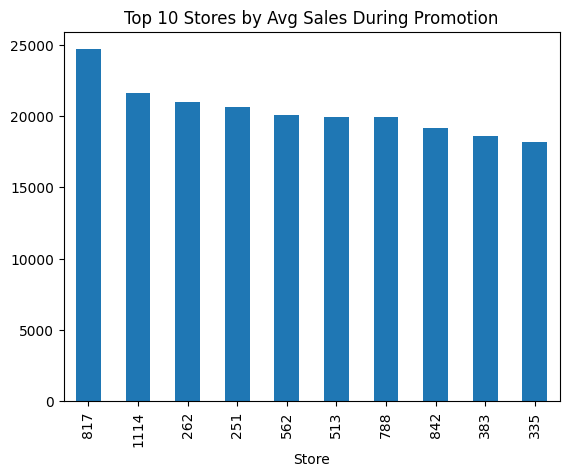

In [6]:
promo_sales = df[df['Promo'] == 1].groupby('Store')['Sales'].mean().sort_values(ascending=False).head(10)
promo_sales.plot(kind='bar', title='Top 10 Stores by Avg Sales During Promotion')


### Q6: Do State Holidays impact sales more than School Holidays?
**Insight:**<br>
State holidays (a, b, c) cause a dramatic drop (~80%) in sales.<br>
School holidays have minimal impact on sales.


<Axes: title={'center': 'Sales by State Holiday Type'}, xlabel='StateHoliday'>

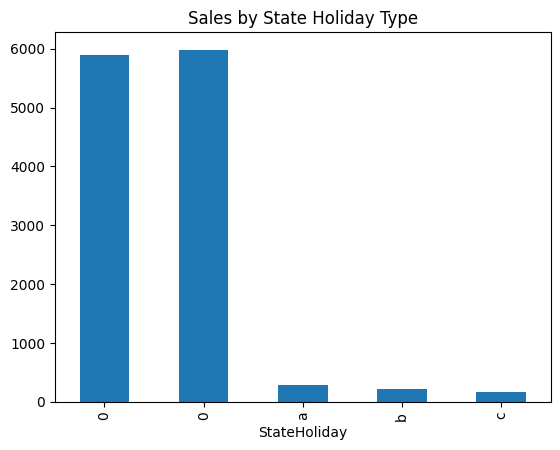

In [9]:
df.groupby('StateHoliday')['Sales'].mean().plot(kind='bar', title='Sales by State Holiday Type')

<Axes: title={'center': 'Sales by School Holiday'}, xlabel='SchoolHoliday'>

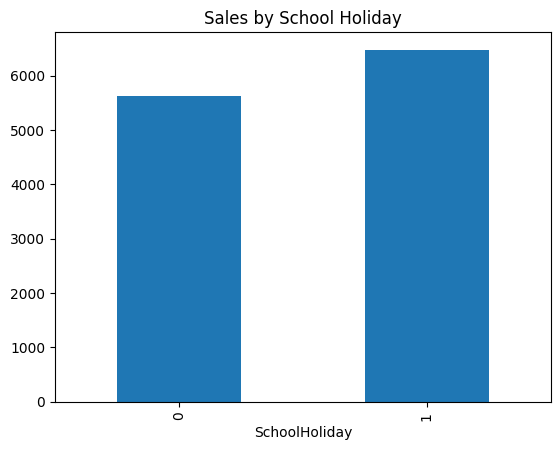

In [8]:
df.groupby('SchoolHoliday')['Sales'].mean().plot(kind='bar', title='Sales by School Holiday')

### Q7: How different are sales on holidays vs normal days?
**Insight:**<br>
Sales are significantly lower on public holidays. <br>
This highlights the importance of adjusting staff and stock on holidays.

<Axes: title={'center': 'Sales: Holiday vs Non-Holiday'}, xlabel='StateHoliday'>

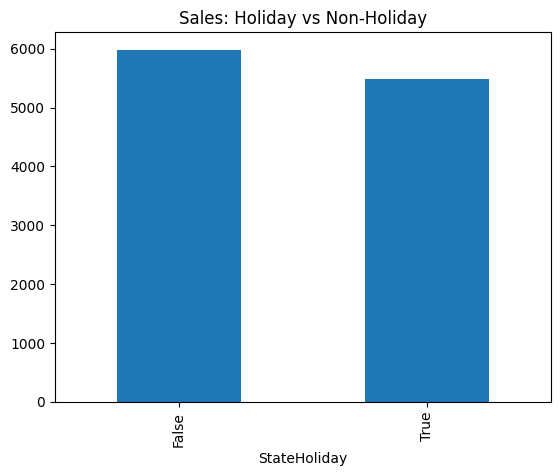

In [10]:
is_holiday = df['StateHoliday'] != '0'
df.groupby(is_holiday)['Sales'].mean().plot(kind='bar', title='Sales: Holiday vs Non-Holiday')


### Q8:Do School Holidays affect sales?
**Insight:**<br>
A small increase in sales during school holidays, but the difference is not significant.



<Axes: title={'center': 'Sales by School Holiday'}, xlabel='SchoolHoliday'>

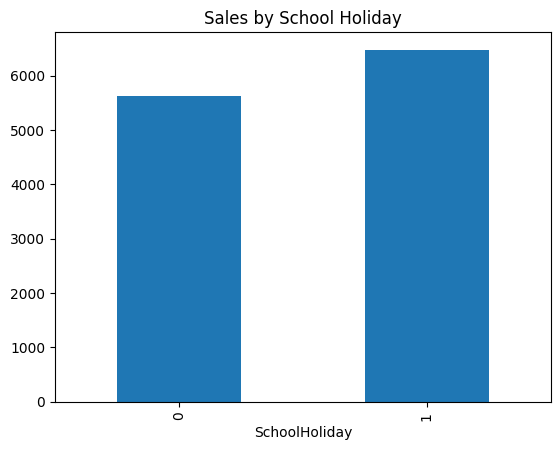

In [11]:
df.groupby('SchoolHoliday')['Sales'].mean().plot(kind='bar', title='Sales by School Holiday')


### Q9:Does Competition Distance or Presence impact Sales?
**Insight:**
Stores without nearby competition tend to have lower sales, possibly because competitors drive market demand overall.



<Axes: title={'center': 'Sales by Competition Presence'}, xlabel='HasCompetition'>

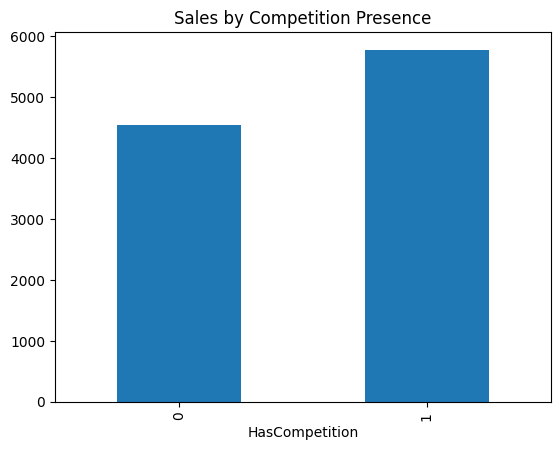

In [12]:
df['HasCompetition'] = df['CompetitionDistance'].notna().astype(int)
df.groupby('HasCompetition')['Sales'].mean().plot(kind='bar', title='Sales by Competition Presence')


### Q10: Does Promo2 (Second Promotion Type) boost sales?
**Insight:**<br>
Surprisingly, stores with Promo2 have slightly lower average sales.<br> Possibly due to timing, targeting, or overlapping with other campaigns.

<Axes: title={'center': 'Sales with/without Promo2'}, xlabel='Promo2'>

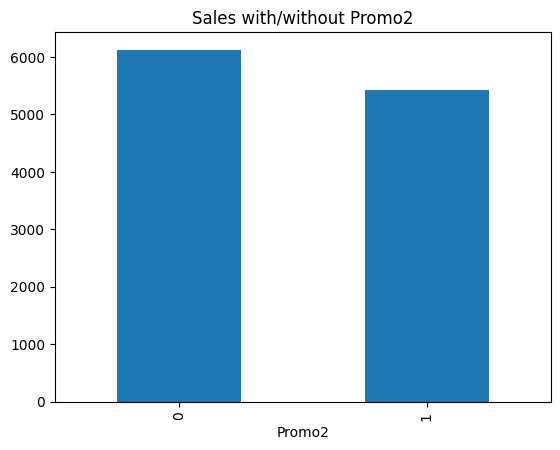

In [13]:
df.groupby('Promo2')['Sales'].mean().plot(kind='bar', title='Sales with/without Promo2')
